## 输入共享

输入共享其实在实际应用中并不常见，但是输入共享可以视作 Input 层存在的必要性案例，让人了解 Input 层的另一个作用。  

Keras 其实在每一个 layers 函数中都提供了 input_shape 这个参数选项，这导致很多博主在输入处理的时候跳过了 Input 层。  
如：
model = Conv2D(32, 3, input_shape=(28, 28, 1))  

以我目前的水平并没有资格去评价他们的做法不正确或者会对模型有什么影响。  
但我对自己坚持要求用 Input 层作为模型输入的部分，除非是 Sequential 这种简单模型。  

实际上后面以 Sequential 直接搭建模型的情况少之又少，因为很难对其进行花式操作。  
但是，如下操作是比较常见的。  
```python
Sequential([
    Input(...),
    MyLayer(...)  # 自定义的层
])

```
Advance 中会出现用 Sequential 搭建一个大模型中简单的栈式部分。  

如果你是按照顺序读下来的话就会发现整个项目中只有 Quick Start 中Case01、Case02和Case03直接使用了 Sequential 搭建模型，其他代码中均是用 Input 明确输入层。这里可以当做给自己的一个作业：将这三个案例中的模型用 Input 形式改写。

In [2]:
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import sequence

import numpy as np
import matplotlib.pyplot as plt

## 载入数据

In [5]:
(x_train, y_train), (_, _) = mnist.load_data()

x_train = x_train / 255.0
y_train = to_categorical(y_train, num_classes=10)

## 构建模型

In [9]:
input_layer = Input(shape=(28, 28, 1))

branch_1 = Conv2D(32, 3, activation='relu')(input_layer)
branch_1 = Conv2D(10, 3, activation='relu')(branch_1)

branch_2 = Flatten()(input_layer)
branch_2 = Dense(10)(branch_2)

merged = multiply([branch_1, branch_2])
merged = Flatten()(merged)
merged_out = Dense(10)(merged)

## 多输出模型

In [10]:
model_1 = Model(inputs=input_layer, outputs=[branch_1, branch_2])

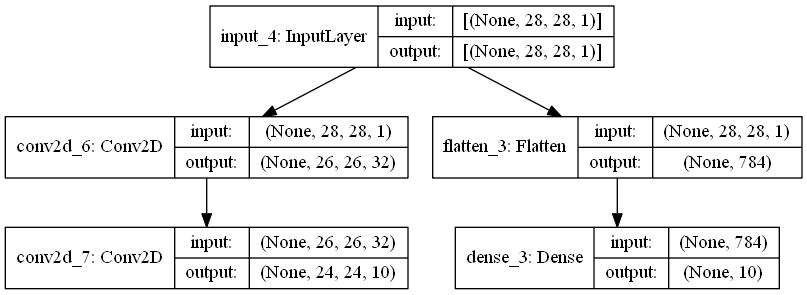

In [11]:
plot_model(model_1, show_shapes=True)

## 单输出模型

In [12]:
model_2 = Model(inputs=input_layer, outputs=merged_out)

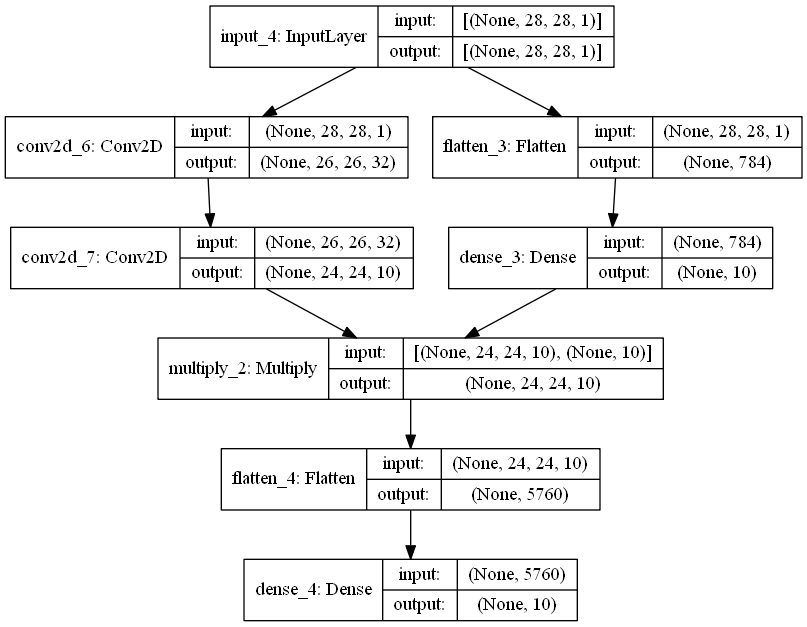

In [13]:
plot_model(model_2, show_shapes=True)